In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import randint

In [2]:
wine_df = pd.read_csv('wine_data.csv')
cw_df = pd.read_csv('chickwts_data.csv')
arrest_df = pd.read_csv('arrests_data.csv')

In [3]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
cw_df.head()

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966


In [5]:
arrest_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
wine_df.isnull().values.any(), cw_df.isnull().values.any(), arrest_df.isnull().values.any() 

(False, False, False)

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
cw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

In [9]:
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
cw_df.describe()

,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.874000,3.990000,3.594000,1.668800,0.647800,10.418000,5.625000,2911.280000,0.942700,0.378500,2.529000,0.649500,1.654600,313.270000,27.147503
std,2.099332,0.707607,0.694832,1.177822,0.090716,0.854268,0.831498,102.461333,0.121172,0.054018,0.580716,0.055421,0.069201,12.668146,7.082035
min,15.000000,2.300000,2.300000,0.670000,0.400000,9.000000,4.100000,2711.000000,0.690000,0.260000,1.500000,0.550000,1.510000,290.000000,16.285714
25%,17.300000,3.500000,3.100000,0.855000,0.580000,9.800000,4.900000,2851.500000,0.860000,0.340000,2.000000,0.610000,1.610000,303.000000,22.000000
50%,19.050000,3.950000,3.600000,0.995000,0.645000,10.300000,5.650000,2897.500000,0.930000,0.380000,2.600000,0.650000,1.650000,313.500000,24.533333
75%,20.500000,4.500000,4.100000,3.037500,0.712500,11.200000,6.325000,2973.250000,1.022500,0.420000,3.000000,0.692500,1.690000,323.000000,31.013158
max,23.400000,5.700000,5.000000,3.950000,0.840000,11.900000,7.000000,3165.000000,1.240000,0.500000,3.500000,0.750000,1.830000,337.000000,46.250000


In [12]:
arrest_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
cw_num = ['proteinContent', 'fatContent', 'fiberContent',
          'calciumContent', 'phosphorusContent', 'moistureContent', 'ashContent',
          'metabolizableEnergy', 'lysineContent', 'methionineContent',
          'particleSize', 'density', 'price', 'shelfLife', 'weight']

arrest_num = ['Murder', 'Assault', 'UrbanPop', 'Rape']

#The lab said scale now, but we need to train test split the wine dataset and do not want to leak.

#scaler = StandardScaler()
#wine_scaled = scaler.fit_transform(wine_df)
#cw_scaled = scaler.fit_transform(cw_df[cw_num])
#arrest_scaled = scaler.fit_transform(arrest_df[arrest_num])

In [14]:
wine_df.shape, cw_df.shape, arrest_df.shape

((178, 14), (100, 16), (50, 5))

# Wine Knn

In [15]:
wine_df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

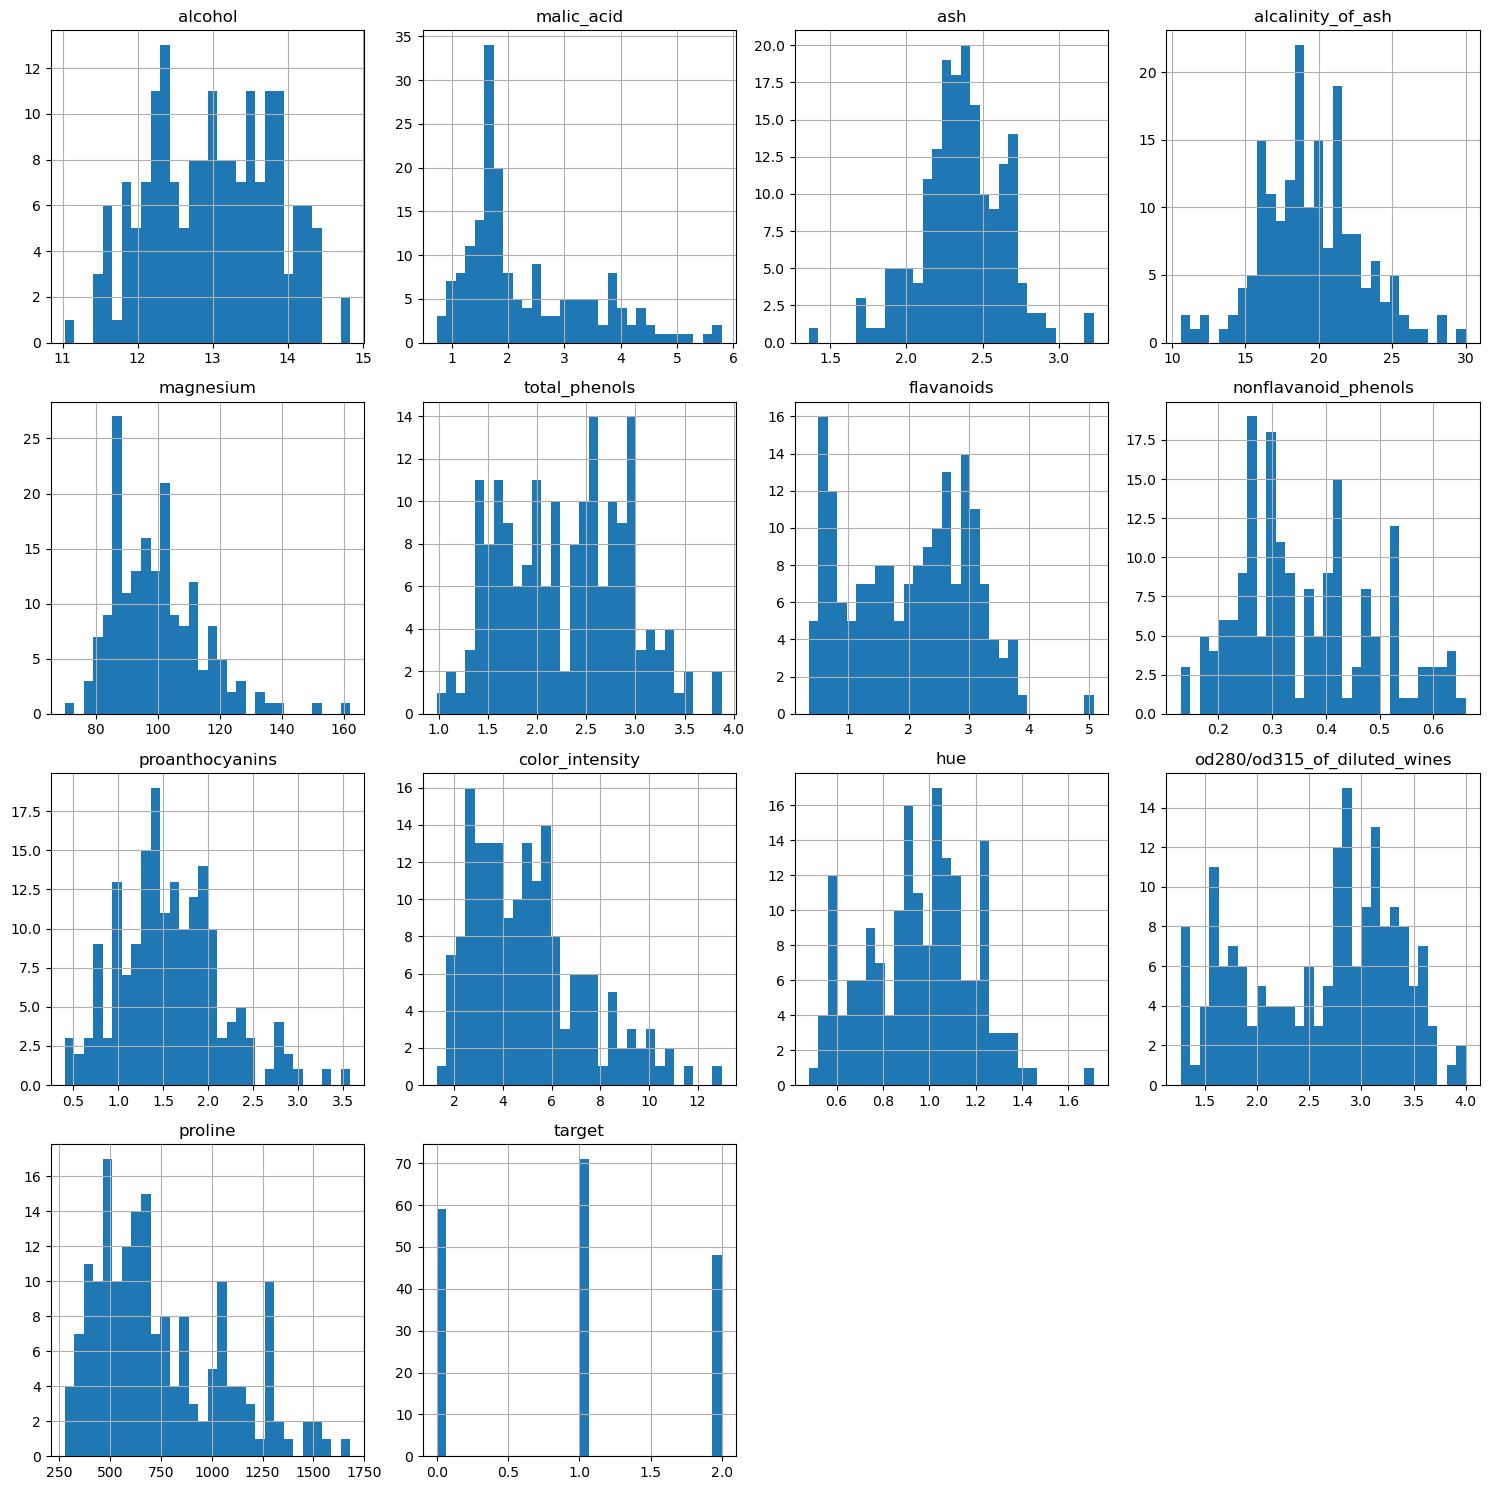

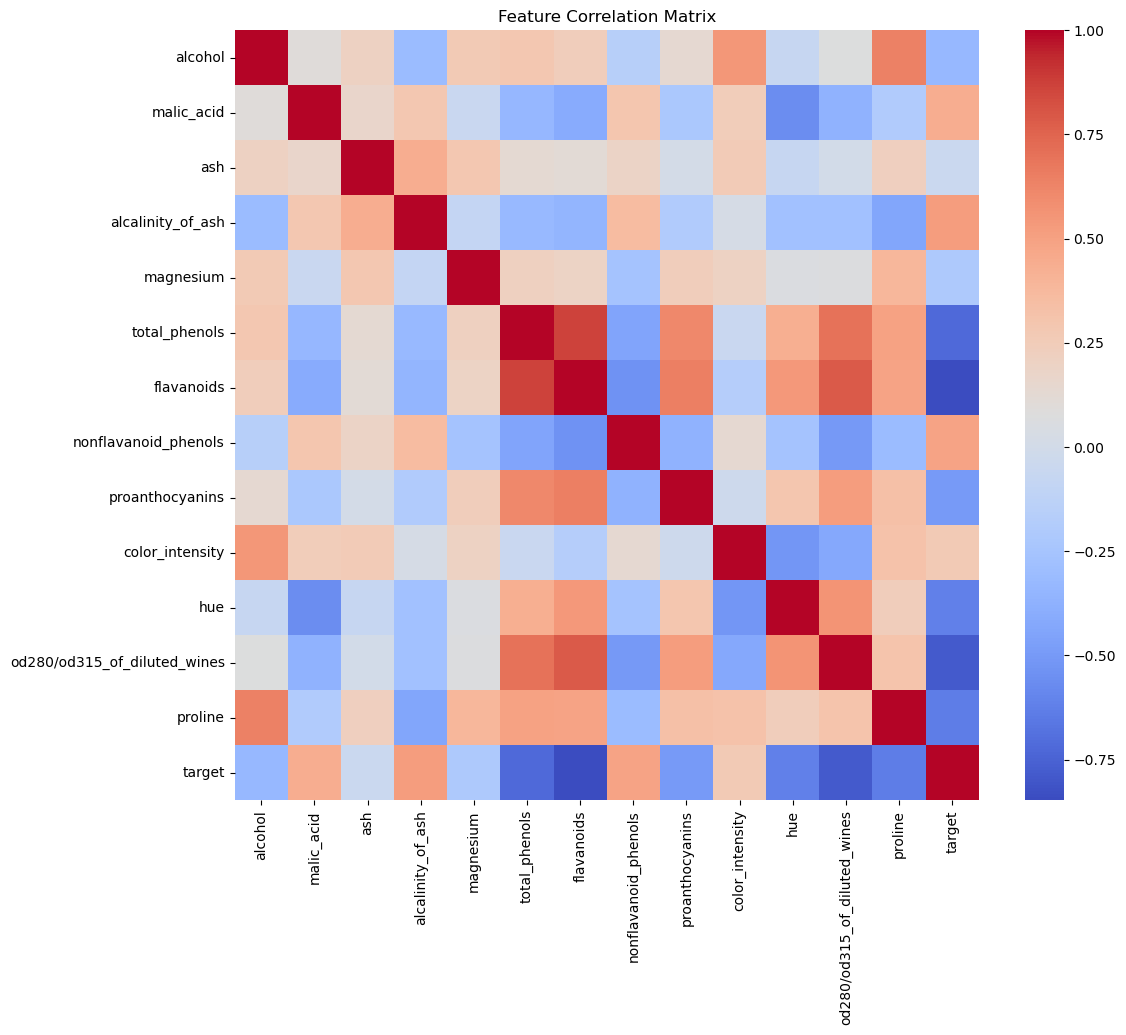

In [16]:
plt.figure(figsize=(12, 8))
wine_df.hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

# Check for feature correlations
plt.figure(figsize=(12, 10))
wine_cm = wine_df.corr()
sns.heatmap(wine_cm, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [17]:
X = wine_df.drop(columns = 'target')
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

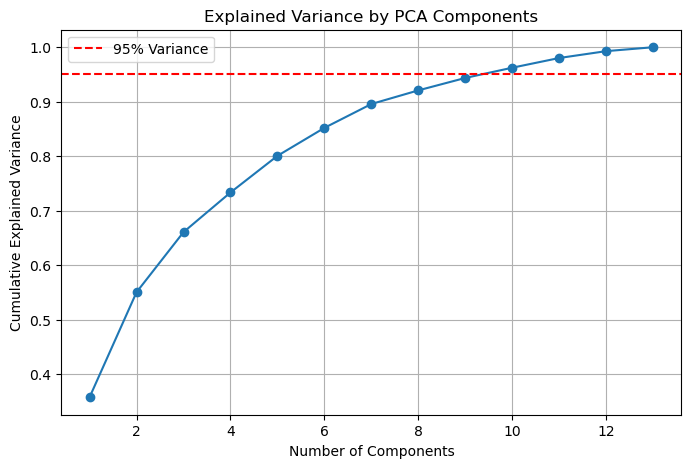

In [19]:
pca_full = PCA().fit(X_train_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

We want to capture 95% variance, which means we need 10 principal components

In [20]:
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 28, 'weights': 'distance'}
Best CV Accuracy: 0.9791

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


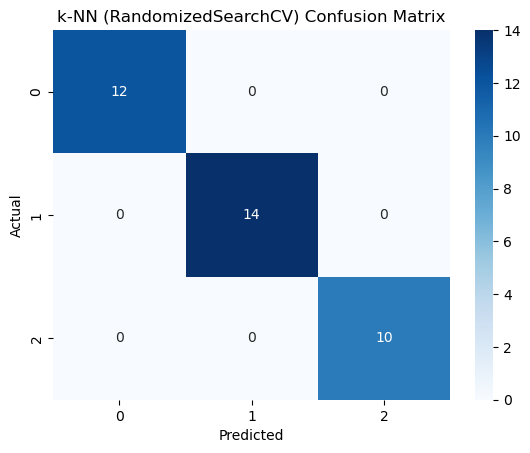

In [21]:
param_dist = {
    'n_neighbors': randint(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=50,               
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_pca, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", round(random_search.best_score_, 4))

best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_pca)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("k-NN (RandomizedSearchCV) Confusion Matrix")
plt.show()

RandomSearch gave a strong 0.9791 accuracy, but we may improve with grid search around these params

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'distance'}
Best CV Accuracy: 0.9791

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

 Confusion Matrix:


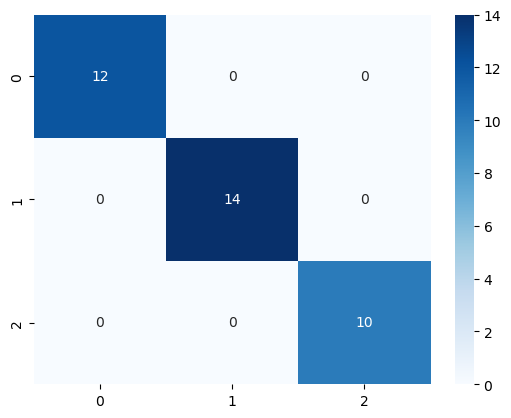

In [22]:
param_grid = {
    'n_neighbors': [25, 26, 27, 28, 29, 30, 31],
    'weights': ['distance', 'uniform'],
    'metric': ['euclidean']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on training data
grid_search.fit(X_train_pca, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test_pca)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()

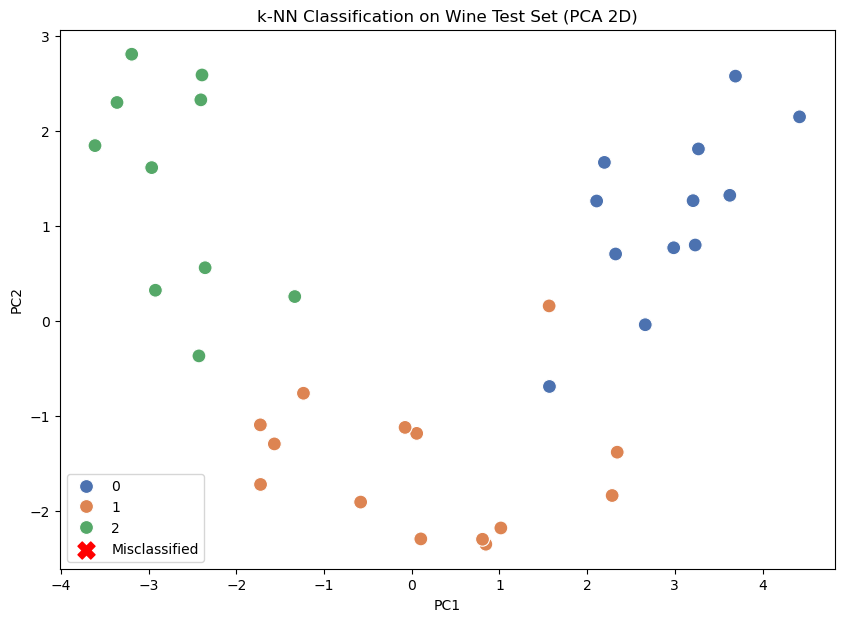

In [23]:
df_test = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'True Label': y_test,
    'Predicted Label': y_pred
})

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df_test, x='PC1', y='PC2', 
    hue='Predicted Label',
    palette='deep', s=100, legend='full'
)

misclassified = df_test[df_test['True Label'] != df_test['Predicted Label']]

plt.scatter(
    misclassified['PC1'], misclassified['PC2'], 
    color='red', marker='X', s=150, label='Misclassified'
)

plt.title('k-NN Classification on Wine Test Set (PCA 2D)')
plt.legend()
plt.show()

Model classification report showed perfect accuracy on the test set, and visualization with first 2 PCs, which explains about 55% of the variance, shows general distribution of the clusters. Model shows strong generalization on data available to automatically classify wines on their chemical properties for inventory management and quality control.

# Chickwts recommendation

In [24]:
cw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

<Figure size 1200x800 with 0 Axes>

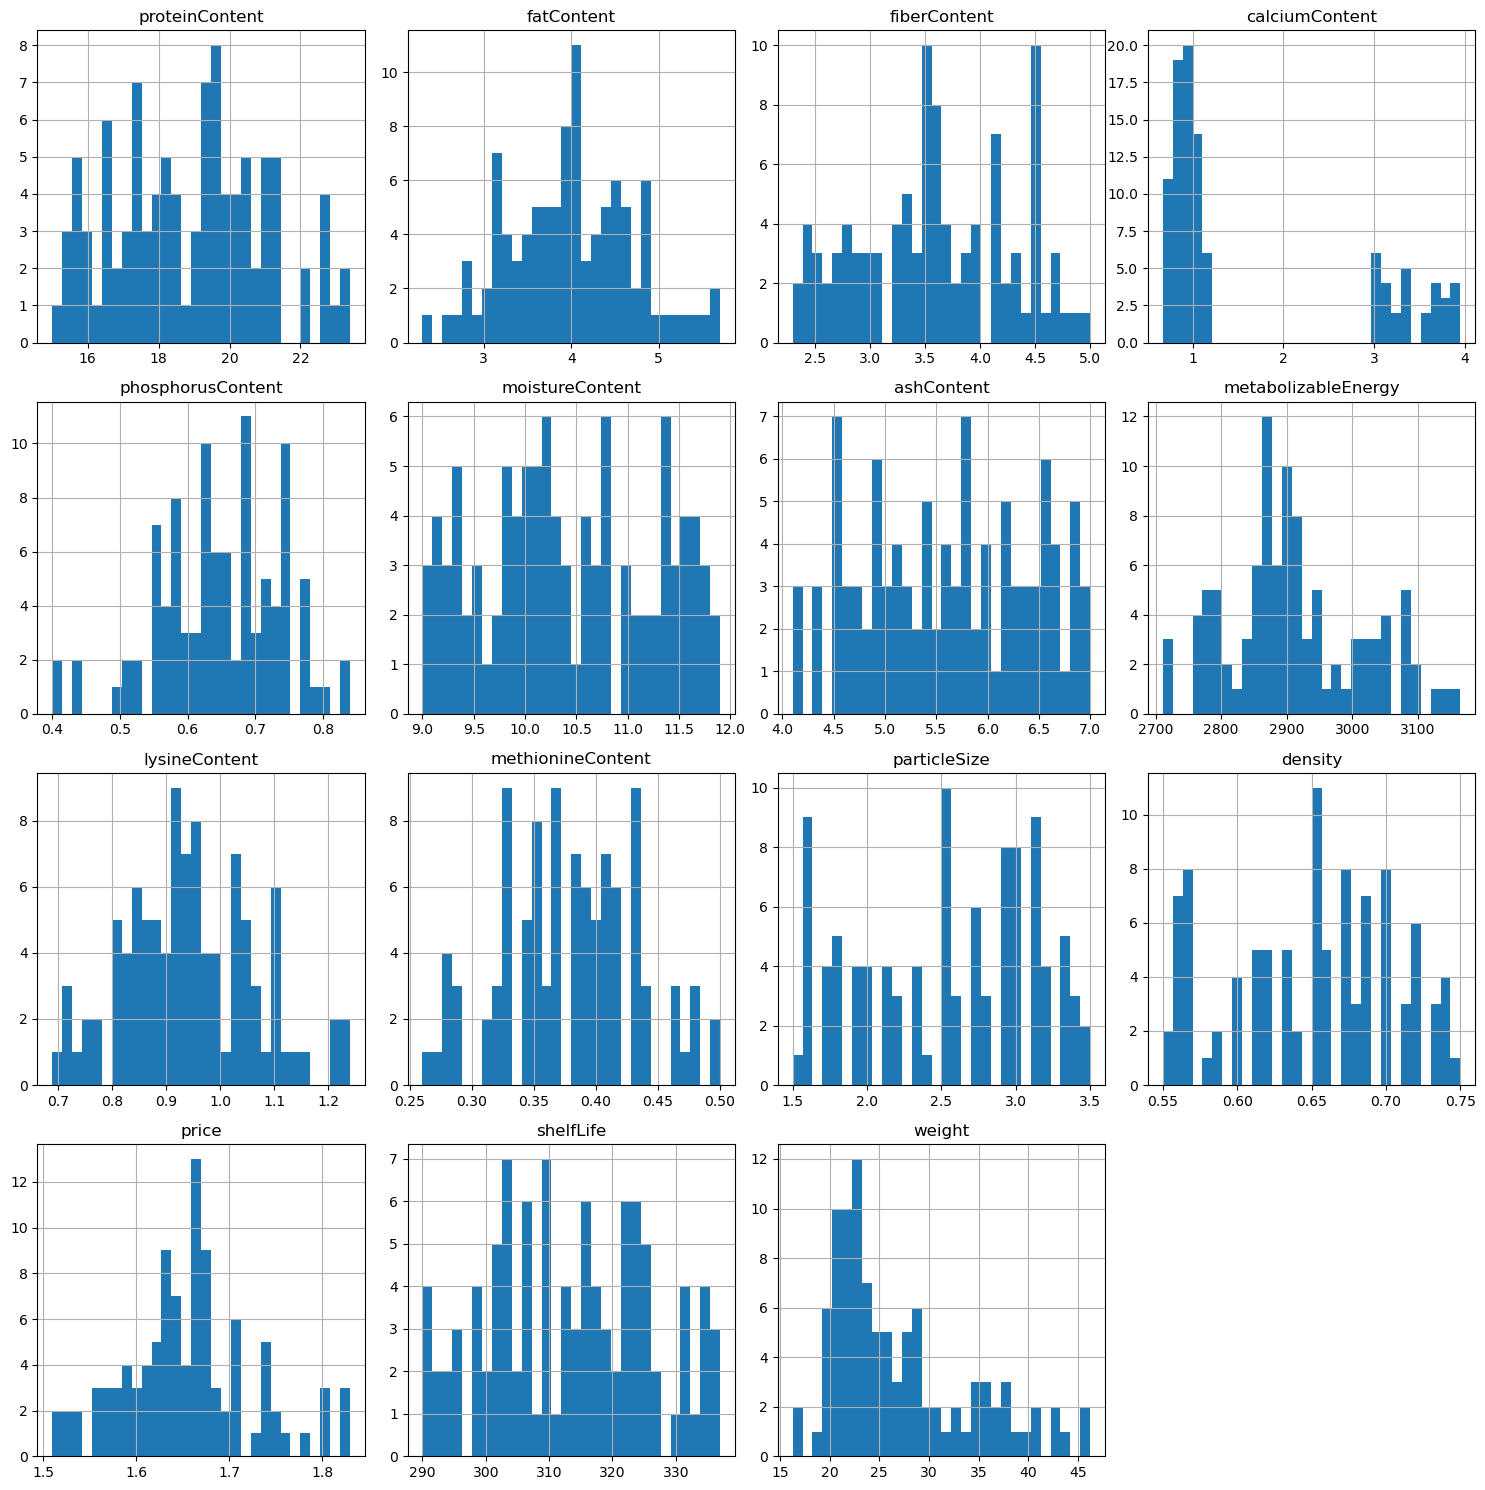

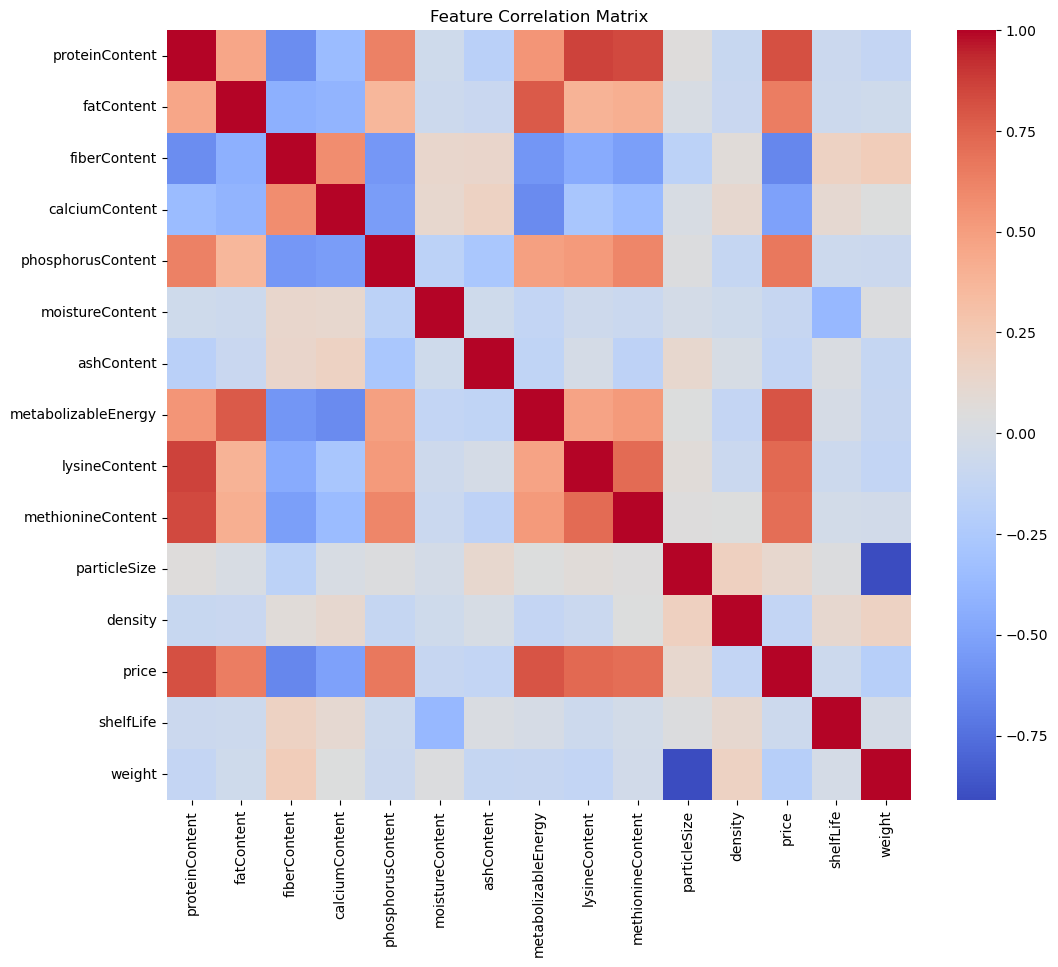

In [25]:
plt.figure(figsize=(12, 8))
cw_df.hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

# Check for feature correlations
plt.figure(figsize=(12, 10))
cw_cm = cw_df[cw_num].corr()
sns.heatmap(cw_cm, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [26]:
scaler = StandardScaler()
cw_scaled = scaler.fit_transform(cw_df[cw_num]) 

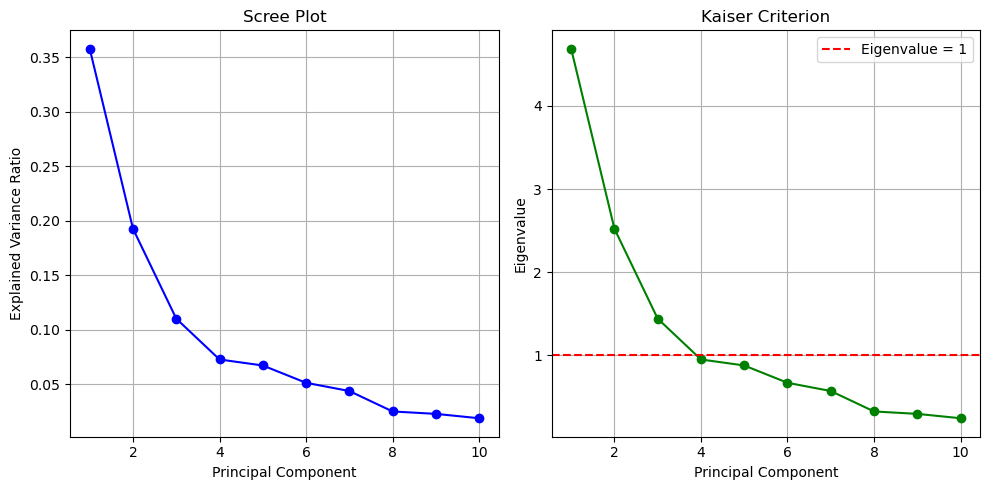

Number of components retained by Kaiser criterion (eigenvalue > 1): 3


In [27]:
eigenvalues = pca.explained_variance_

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Kaiser criterion: eigenvalues > 1
plt.subplot(1, 2, 2)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='Eigenvalue = 1')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Kaiser Criterion')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print components retained by Kaiser criterion
num_kaiser = np.sum(eigenvalues > 1)
print(f"Number of components retained by Kaiser criterion (eigenvalue > 1): {num_kaiser}")

Kaiser suggests 3 components but scree plot gives 4 PCs before the "elbow"

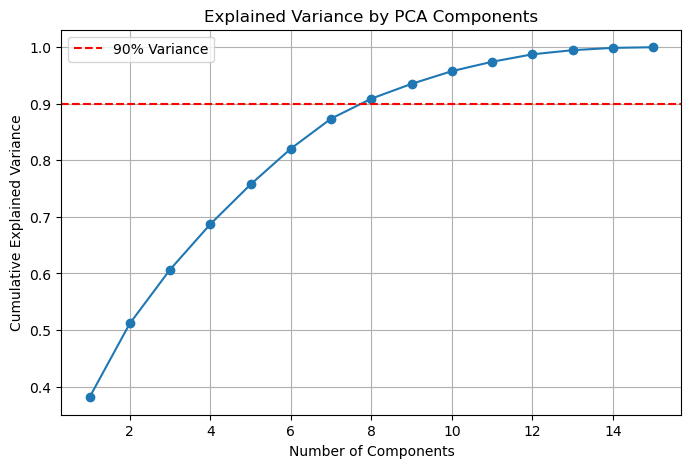

In [28]:
pca_full_cw = PCA().fit(cw_scaled)

explained_variance_cw = np.cumsum(pca_full_cw.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_cw) + 1), explained_variance_cw, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

However, we want to capture at least 90% variance for the feeds, which requires at least 8 components

In [29]:
# 2. Apply PCA to reduce to 8 component
pca_8 = PCA(n_components=8, random_state=42)
cw_pca = pca_8.fit_transform(cw_scaled)

# 3. Compute cosine similarity matrix between feeds
cos_sim_matrix = cosine_similarity(cw_pca)

# 4. Create a DataFrame of cosine similarity (using feed_name as index & columns)
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=cw_df['feed_name'], columns=cw_df['feed_name'])

# 5. Recommend top N similar feeds for a given feed
def recommend_similar_feeds(feed_name, top_n=5):
    if feed_name not in cos_sim_df.index:
        return f"Feed '{feed_name}' not found."
    
    similar_scores = cos_sim_df.loc[feed_name].drop(feed_name).sort_values(ascending=False)
    return similar_scores.head(top_n)

sim = recommend_similar_feeds('FirstPeck', top_n=5)
print("Top 5 similar feeds using 8 PCs:\n", sim)

Top 5 similar feeds using 8 PCs:
 feed_name
FeatherUp Complete      0.852799
BroilerPlus Advanced    0.747784
WeightGain Pro          0.742203
StartRight Formula      0.664337
ShellMax Enhanced       0.618861
Name: FirstPeck, dtype: float64


Function recommends similar feeds based on given feed. Evaluation needed after deployment to track recommendation performance, possibly with A/B testing. 

Heatmap below gives full layout of similar feeds for quick reference.

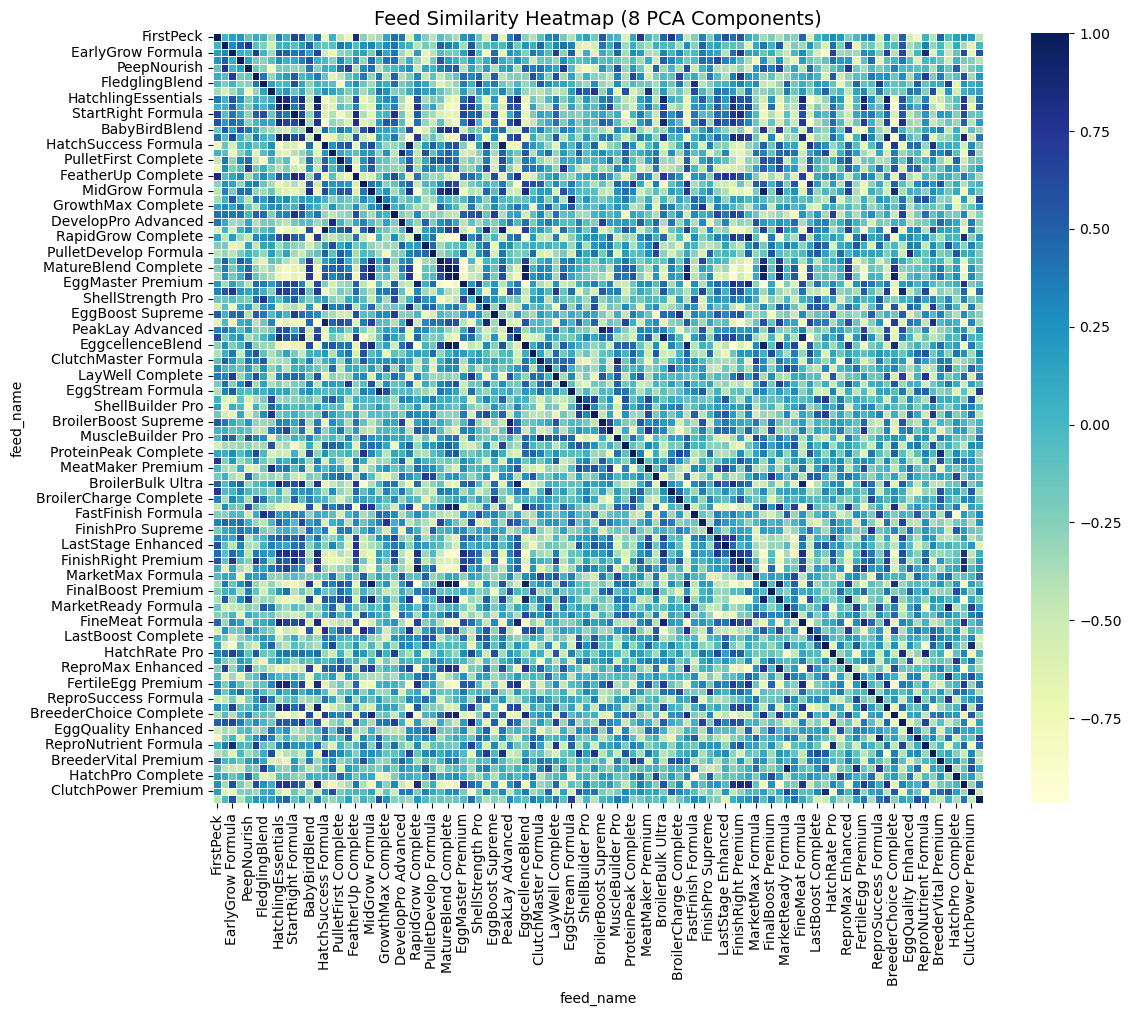

In [30]:
# Heatmap for 4 principal components
plt.figure(figsize=(12, 10))
sns.heatmap(cos_sim_df, cmap="YlGnBu", linewidths=0.5, square=True)
plt.title("Feed Similarity Heatmap (8 PCA Components)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Arrest Data

In [31]:
arrest_df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [32]:
scaler = StandardScaler()
arrest_scaled = scaler.fit_transform(arrest_df[arrest_num])

In [33]:
pd.DataFrame(arrest_scaled).corr()

,0,1,2,3
0,1.000000,0.801873,0.069573,0.563579
1,0.801873,1.000000,0.258872,0.665241
2,0.069573,0.258872,1.000000,0.411341
3,0.563579,0.665241,0.411341,1.000000


Despite only 4 features, strong correlation can be seen between some metrics, so PCA may provide benefits. We will test both

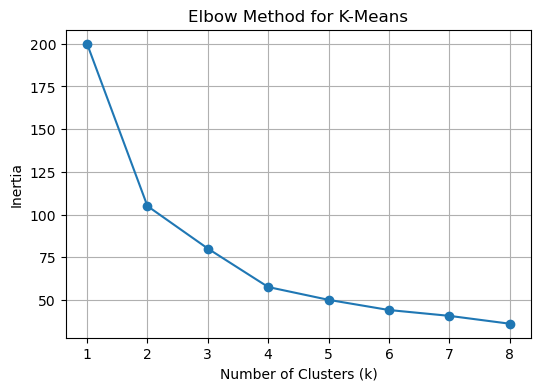

In [34]:
# 3. K-Means Elbow Method
inertias = []
k_range = range(1, 9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(arrest_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.grid(True)
plt.show()

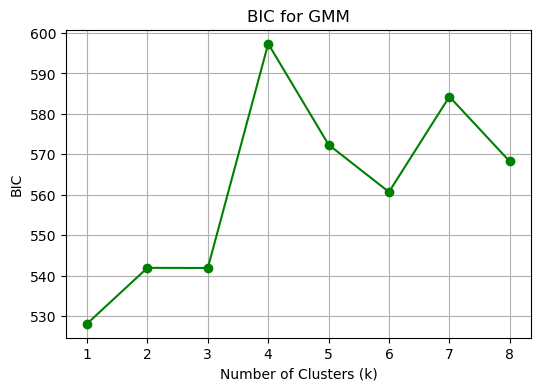

In [35]:
bics = []
k_range = range(1, 9)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(arrest_scaled)
    bics.append(gmm.bic(arrest_scaled))

plt.figure(figsize=(6, 4))
plt.plot(k_range, bics, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BIC')
plt.title('BIC for GMM')
plt.grid(True)
plt.show()


Both K-Means elbow and GMM BIC suggest optimal_k = 4

Variance explained by PC1: 0.6201
Variance explained by PC2: 0.2474
Total variance explained by first 2 PCs: 0.8675


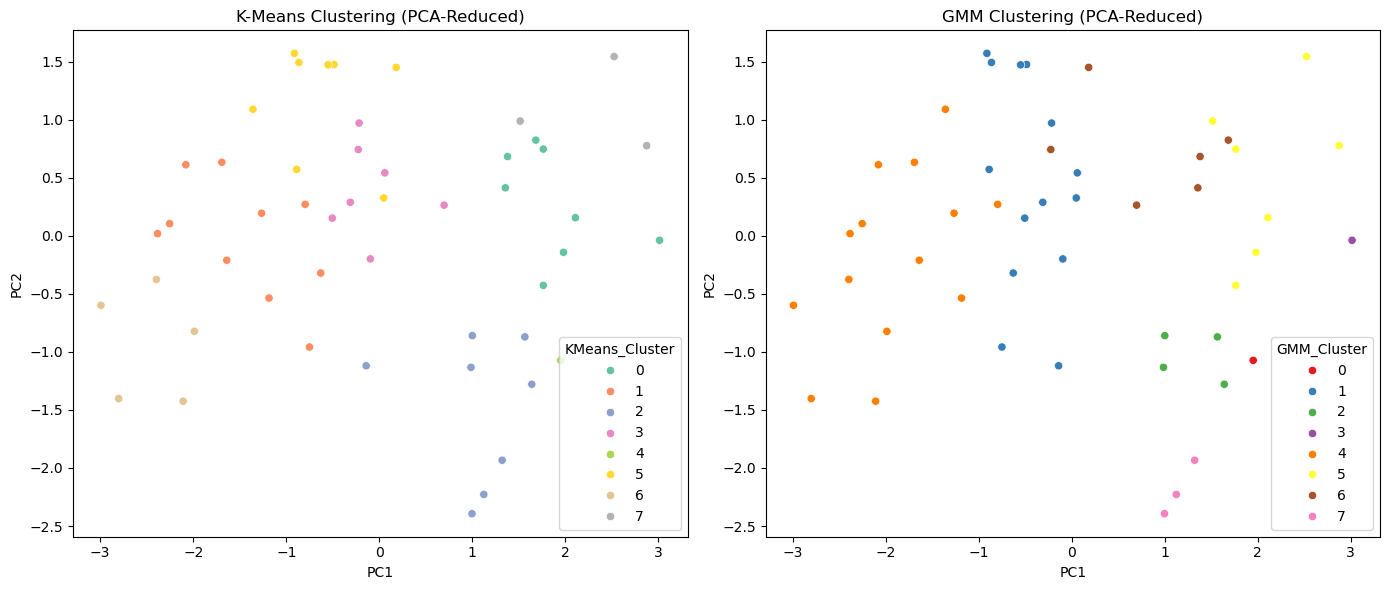

In [36]:
pca = PCA(n_components=2, random_state=42) #lab says use 2
X_pca = pca.fit_transform(arrest_scaled)

explained_var = pca.explained_variance_ratio_
total_explained = explained_var.sum()
print(f"Variance explained by PC1: {explained_var[0]:.4f}")
print(f"Variance explained by PC2: {explained_var[1]:.4f}")
print(f"Total variance explained by first 2 PCs: {total_explained:.4f}")

df_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_vis['KMeans_Cluster'] = kmeans.labels_
df_vis['GMM_Cluster'] = gmm.predict(arrest_scaled)

#Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set2', ax=axes[0])
axes[0].set_title('K-Means Clustering (PCA-Reduced)')

sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='GMM_Cluster', palette='Set1', ax=axes[1])
axes[1].set_title('GMM Clustering (PCA-Reduced)')

plt.tight_layout()
plt.show()

In [37]:
optimal_k = 4

# Clustering on original 4D data
kmeans_4d = KMeans(n_clusters=optimal_k, random_state=42).fit(arrest_scaled)
gmm_4d = GaussianMixture(n_components=optimal_k, random_state=42).fit(arrest_scaled)
gmm_4d_labels = gmm_4d.predict(arrest_scaled)

# Clustering on PCA 2D data
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42).fit(X_pca)
gmm_2d = GaussianMixture(n_components=optimal_k, random_state=42).fit(X_pca)
gmm_2d_labels = gmm_2d.predict(X_pca)

# Calculate silhouette scores
sil_kmeans_4d = silhouette_score(arrest_scaled, kmeans_4d.labels_)
sil_gmm_4d = silhouette_score(arrest_scaled, gmm_4d_labels)

sil_kmeans_2d = silhouette_score(X_pca, kmeans_2d.labels_)
sil_gmm_2d = silhouette_score(X_pca, gmm_2d_labels)

print(f"Silhouette Scores:")
print(f"KMeans on 4D data: {sil_kmeans_4d:.4f}")
print(f"GMM on 4D data: {sil_gmm_4d:.4f}")
print(f"KMeans on 2D PCA data: {sil_kmeans_2d:.4f}")
print(f"GMM on 2D PCA data: {sil_gmm_2d:.4f}")


Silhouette Scores:
KMeans on 4D data: 0.3441
GMM on 4D data: 0.3035
KMeans on 2D PCA data: 0.4424
GMM on 2D PCA data: 0.4129


Using PCA before clustering improved cluster quality.

KMeans might be the better choice here, but the difference isn’t huge, so GMM still could be useful with probabilistic soft clustering.

Below we can see the groupings by state.

In [38]:
X = arrest_df.drop(columns='Unnamed: 0')
state_names = arrest_df['Unnamed: 0']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_labels = kmeans.predict(X_scaled)
gmm_labels = gmm.predict(X_scaled)

cluster_df = pd.DataFrame({
    'State': state_names,
    'KMeans_Cluster': kmeans_labels,
    'GMM_Cluster': gmm_labels
})

cluster_df_sorted = cluster_df.sort_values(by='KMeans_Cluster').reset_index(drop=True)

cluster_df_sorted.head(50)

,State,KMeans_Cluster,GMM_Cluster
0,Michigan,0,5
1,Texas,0,6
2,Arizona,0,5
3,Maryland,0,5
4,New York,0,6
5,New Mexico,0,5
6,Florida,0,3
7,Illinois,0,6
8,Wisconsin,1,4
9,Kentucky,1,1
